In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [218]:
df = pd.read_csv("StudentPerformance.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Data Preprocessing

In [243]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [244]:
df.dropna(axis=0,inplace=True)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [246]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [247]:
num = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(num))

# Calculate IQR
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outlier_condition = ((df[num] < (Q1 - 1.5 * IQR)) |
                     (df[num] > (Q3 + 1.5 * IQR)))

# Count rows with at least one outlier
outliers_iqr = outlier_condition.any(axis=1)
print(f"Number of rows with outliers (IQR method): {outliers_iqr.sum()}")

Numerical Columns: 7
Number of rows with outliers (IQR method): 542


In [248]:
outlier_rows = df[outliers_iqr]
outlier_rows.head() 

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
10,17,80,Low,High,No,8,88,Medium,No,4,Medium,High,Private,Neutral,4,No,College,Moderate,Male,68
76,21,77,Low,Medium,Yes,7,90,Medium,Yes,4,Medium,Medium,Private,Neutral,3,No,Postgraduate,Moderate,Male,68
82,29,78,High,High,Yes,4,93,Low,Yes,5,Medium,High,Public,Neutral,3,No,College,Near,Male,74
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
106,31,100,Medium,Medium,No,7,59,Medium,Yes,2,High,High,Public,Positive,5,No,Postgraduate,Moderate,Male,76


In [249]:
df_clean = df[~outliers_iqr]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               5836 non-null   int64 
 1   Attendance                  5836 non-null   int64 
 2   Parental_Involvement        5836 non-null   object
 3   Access_to_Resources         5836 non-null   object
 4   Extracurricular_Activities  5836 non-null   object
 5   Sleep_Hours                 5836 non-null   int64 
 6   Previous_Scores             5836 non-null   int64 
 7   Motivation_Level            5836 non-null   object
 8   Internet_Access             5836 non-null   object
 9   Tutoring_Sessions           5836 non-null   int64 
 10  Family_Income               5836 non-null   object
 11  Teacher_Quality             5836 non-null   object
 12  School_Type                 5836 non-null   object
 13  Peer_Influence              5836 non-null   object
 1

### Adding new Column called Grade based on Exam Score

In [250]:
def get_grade(score):
    if score >= 97:
        return 'A+'
    elif score >= 93 and score <= 96:
        return "A"
    elif score >= 90 and score <= 92:
        return 'A-'
    elif score >= 87 and score <= 89:
        return 'B+'
    elif score >= 83 and score <= 86:
        return 'B'
    elif score >= 80 and score <= 82:
        return 'B-'
    elif score >= 77 and score <= 79:
        return 'C+'
    elif score >= 73 and score <= 76:
        return 'C'
    elif score >= 70 and score <= 72:
        return 'C-'
    elif score >= 67 and score <= 69:
        return 'D+'
    elif score >= 65 and score <= 66:
        return "D"
    else :
        return 'F'
df_clean["Grade"] = df_clean["Exam_Score"].apply(get_grade)

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3633/2571850557.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Grade"] = df_clean["Exam_Score"].apply(get_grade)


# EDA & Data Visualisation

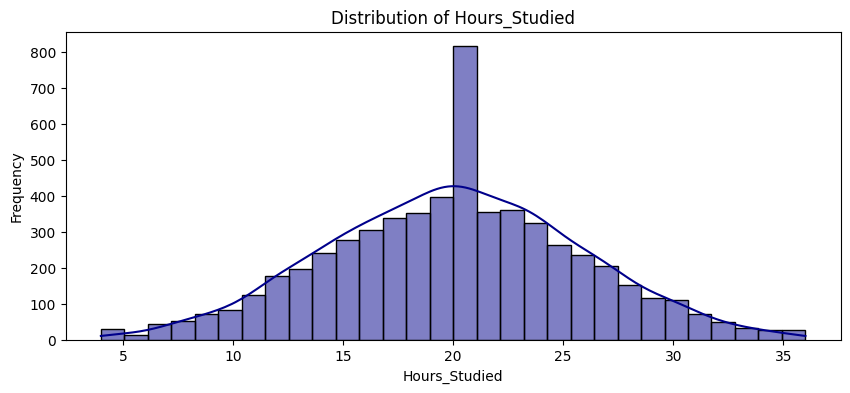

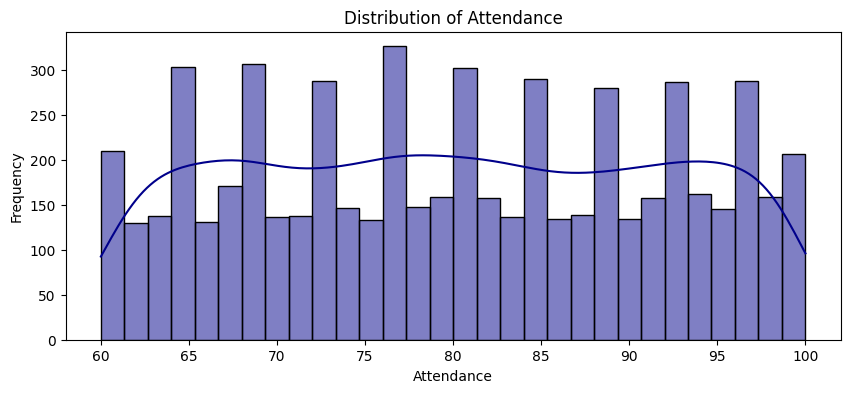

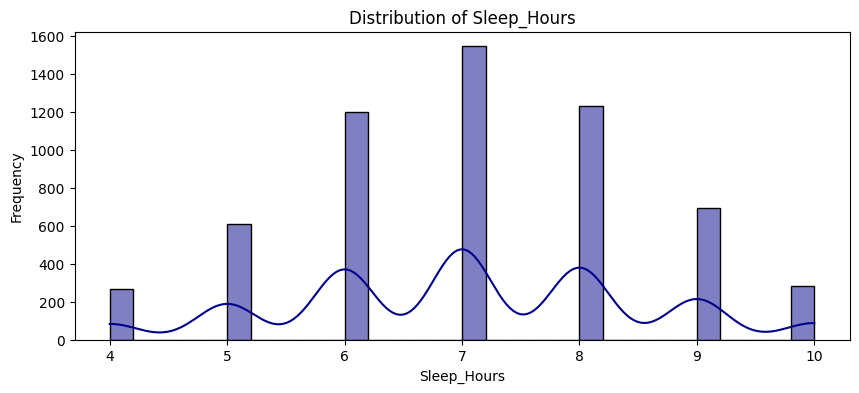

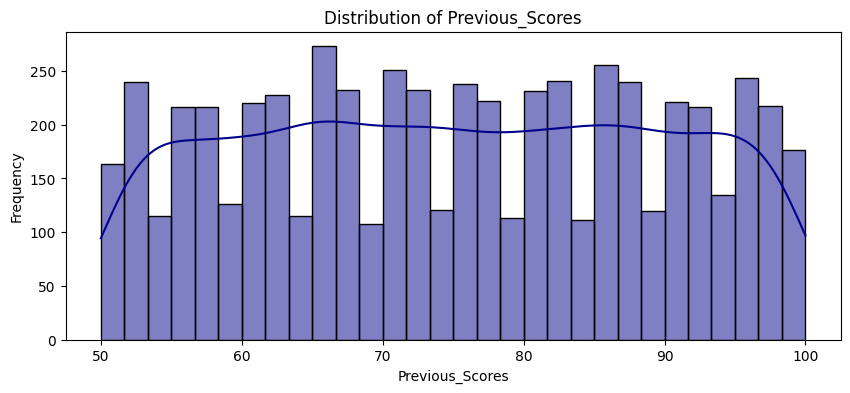

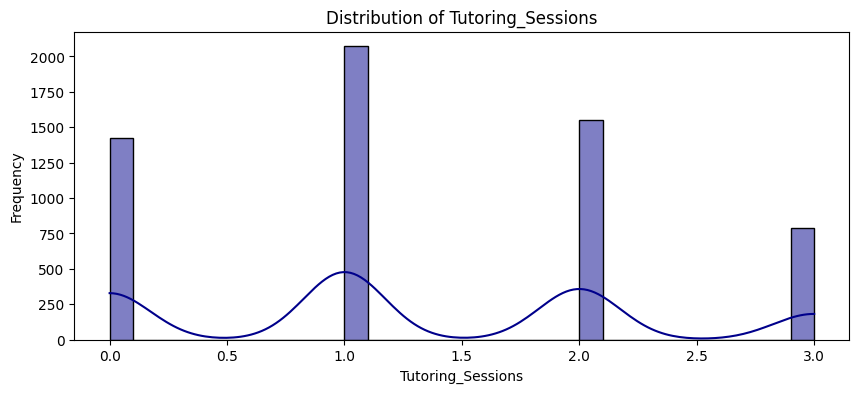

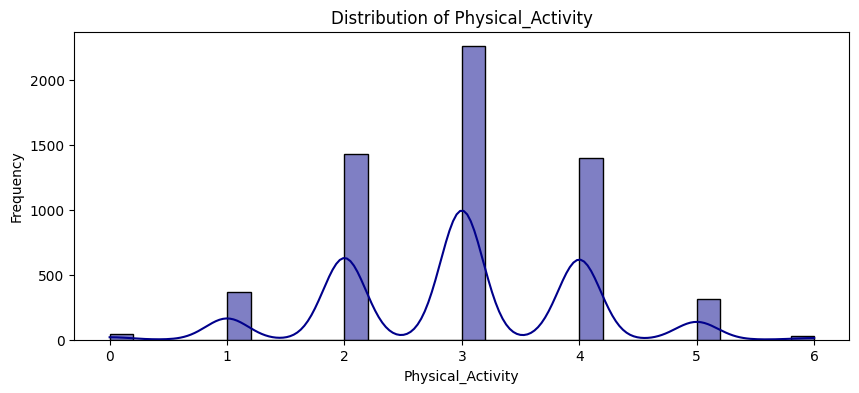

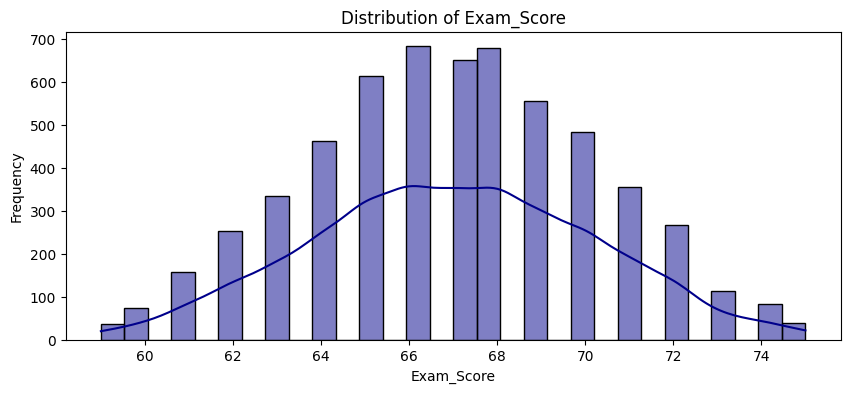

In [251]:
for col in num:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_clean[col], bins=30, kde=True, color='darkblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Categorical Columns: 14


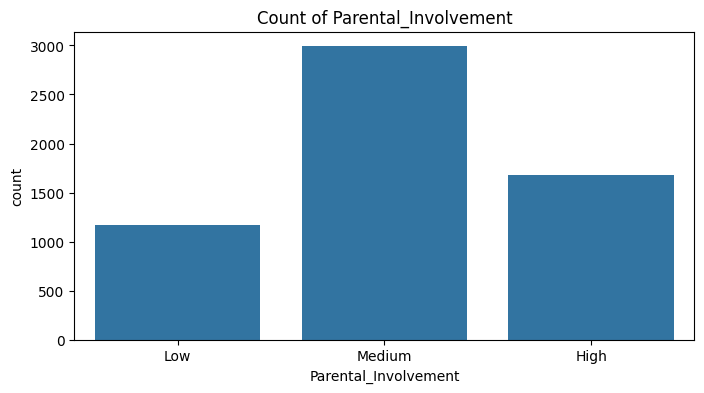

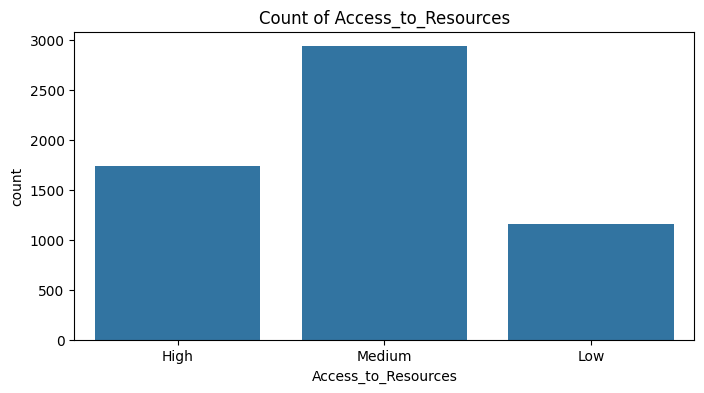

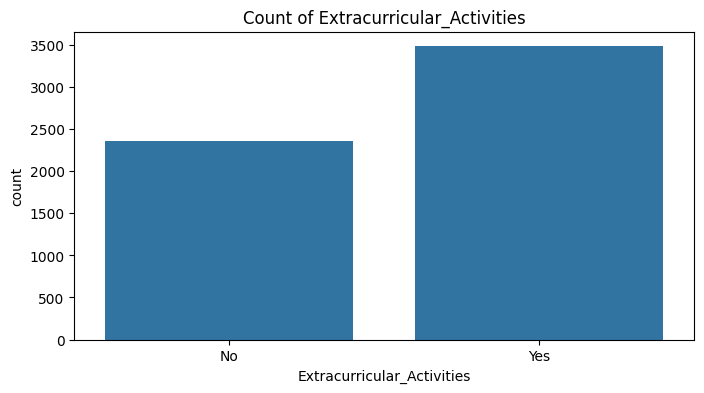

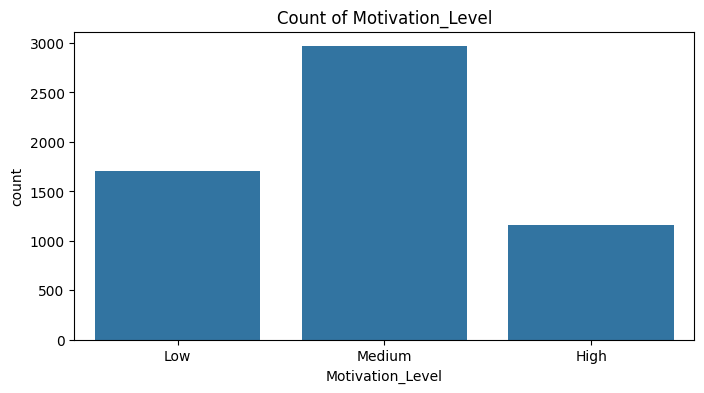

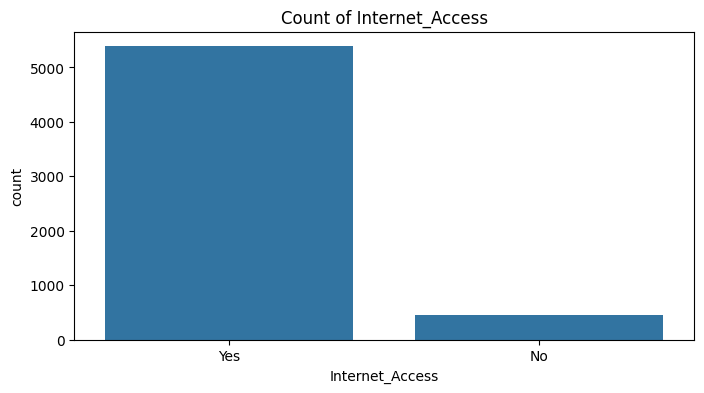

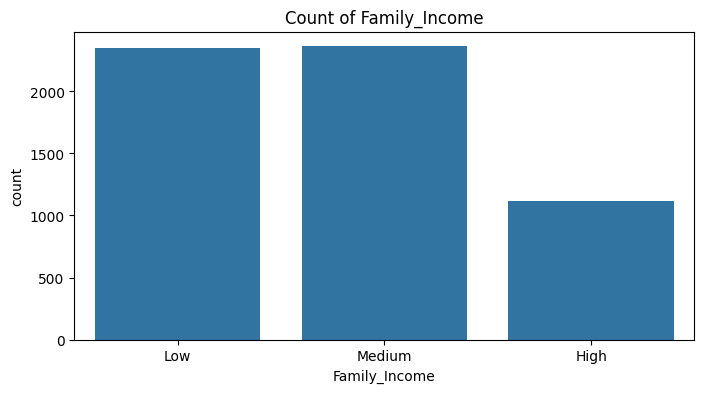

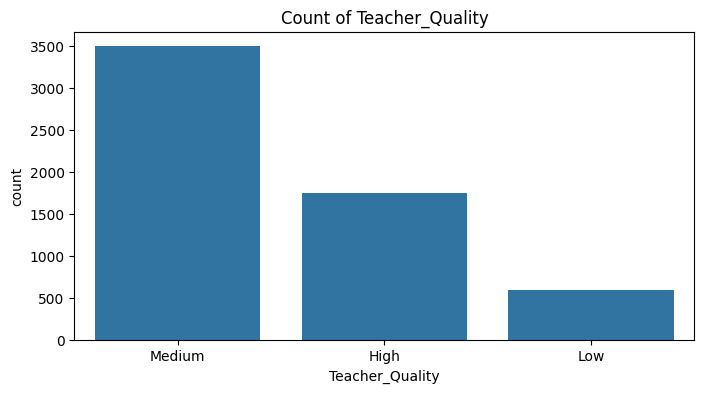

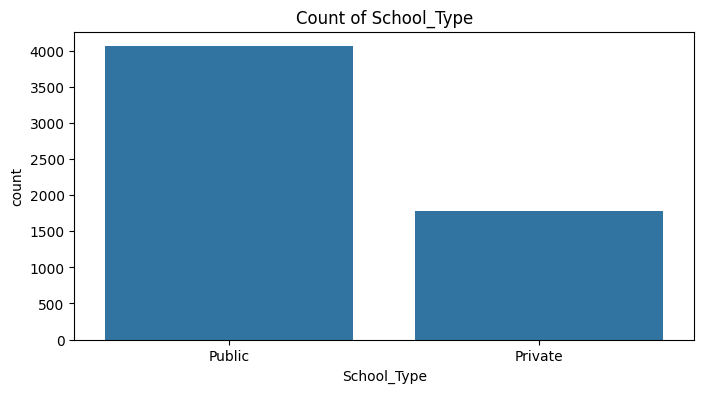

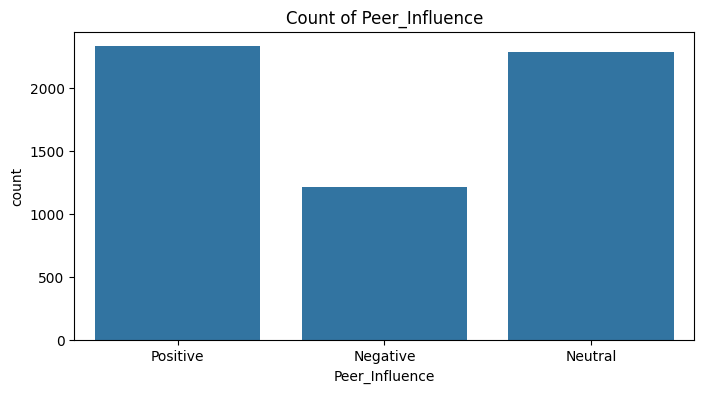

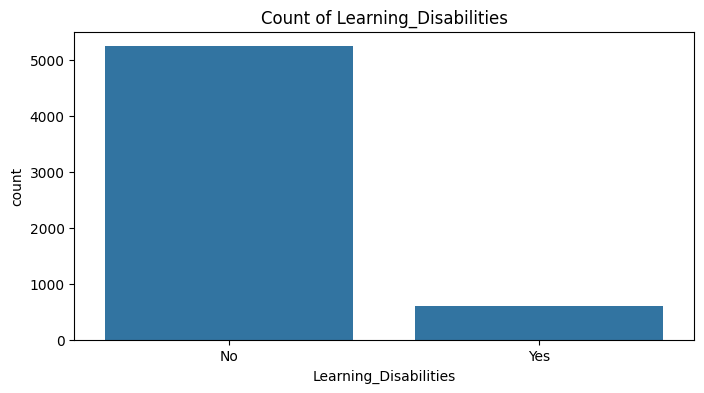

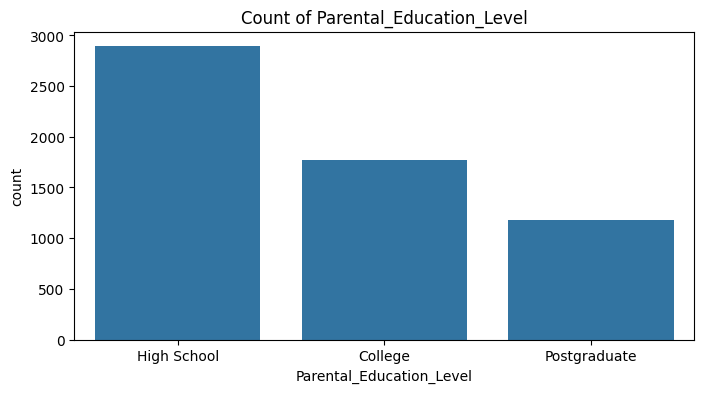

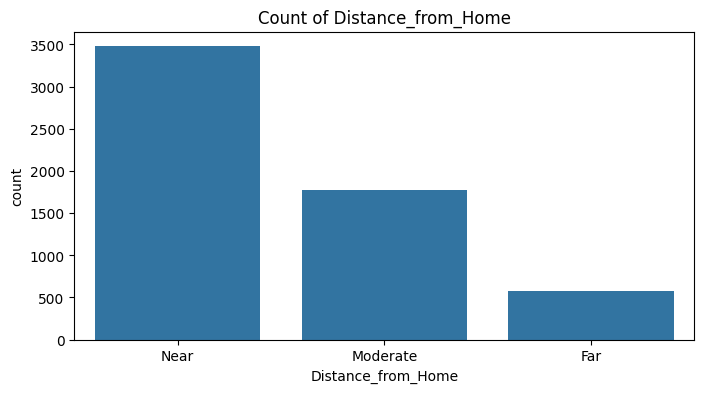

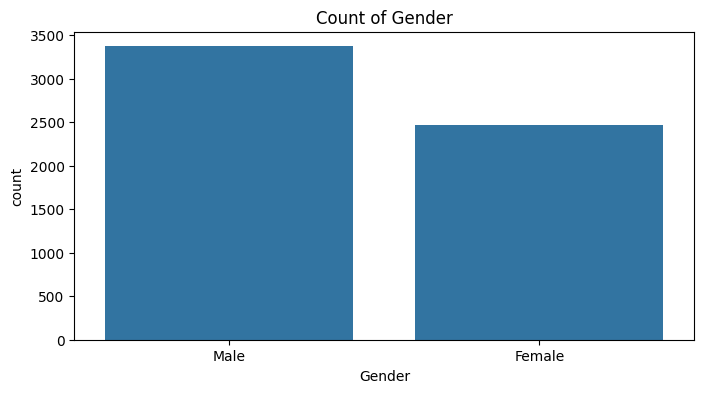

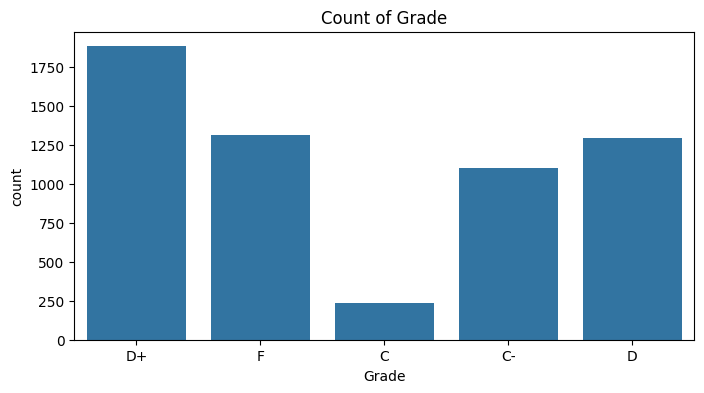

In [252]:
cat = df_clean.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(cat))

for col in cat:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_clean, x=col)
    plt.title(f'Count of {col}')
    plt.show()

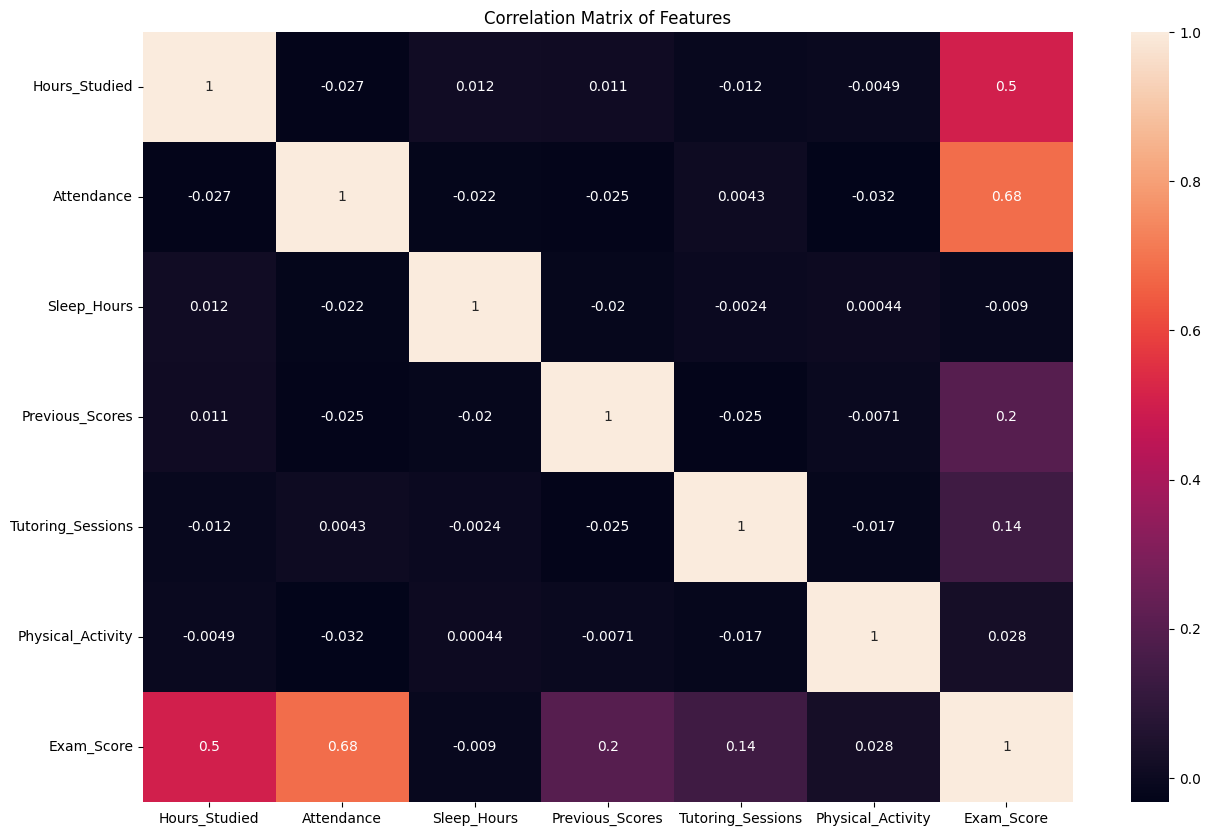

In [253]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_clean.select_dtypes(include=['number']).corr(), annot=True)
plt.title('Correlation Matrix of Features')
plt.show()

* Exam_Score shows a strong correlation with Hours_Studied and Attendance.
* In contrast, the correlation is relatively weak with Previous_Scores and Tutoring_Sessions.

In [254]:
df_clean["Grade"].value_counts()

Grade
D+    1884
F     1316
D     1294
C-    1105
C      237
Name: count, dtype: int64

### Converting to Numerical features

In [255]:
encoders = {}
for col in cat:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    encoders[col] = le

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3633/3660963708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3633/3660963708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3633/3660963708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

### Splitting the data and bulid model 

In [257]:
X = df_clean.drop(columns=[ 'School_Type', 'Gender', 'Exam_Score', "Grade"])
y = df_clean['Exam_Score']

In [258]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=45, stratify=y)

In [259]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on resampled training
X_test_scaled = scaler.transform(X_test)

In [260]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [261]:
y_pred = model.predict(X_test_scaled)

In [262]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

Model Performance:
MAE: 0.861
RMSE: 1.048
R²: 0.895


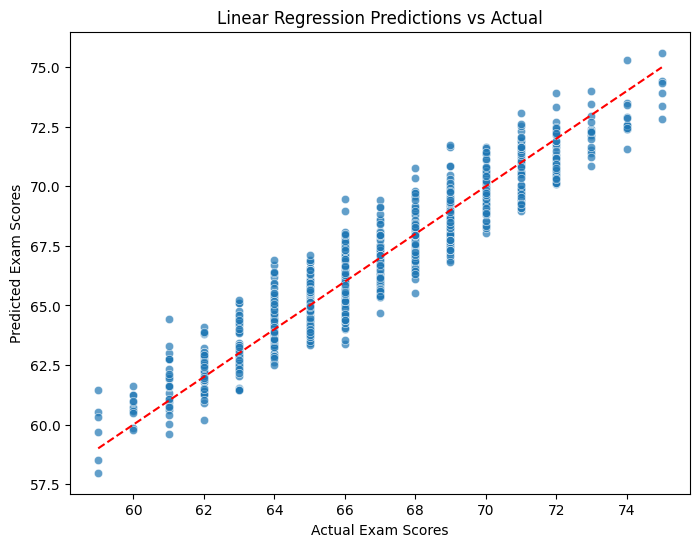

In [263]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression Predictions vs Actual")
plt.show()

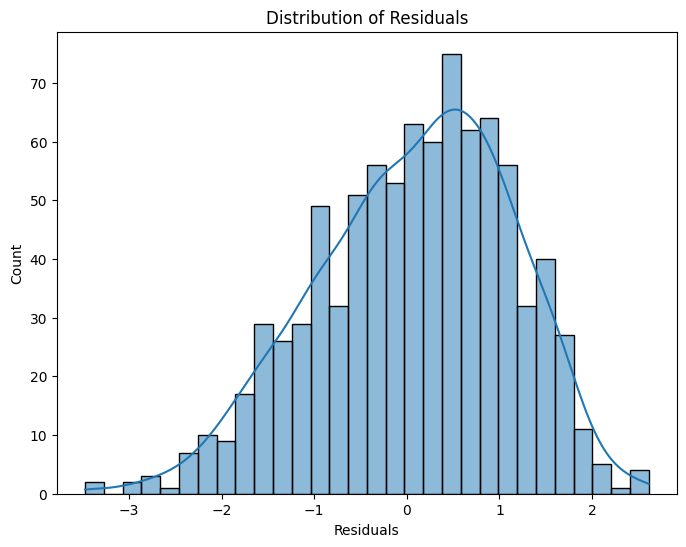

In [264]:
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

### Save Model , Scaler and Encoder

In [265]:
with open("exam_score_model.pkl", "wb") as f:
    pk.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pk.dump(scaler, f)

with open("encoders.pkl", "wb") as f:
    pk.dump(encoders, f)